In [799]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import copy

In [800]:
df = pd.read_csv("Mall_Customers.csv")


In [801]:
df1 = df.iloc[:,3:5]
df1.iloc[:,:].max()[1]

99

In [802]:
#df1.iloc[:,0        ]

In [829]:
k=5
centroids={}
for i in range(k):
    centroids[i+1]=[np.random.randint(0,df1.iloc[:,:].max()[0]),np.random.randint(0,df1.iloc[:,:].max()[1])]

In [830]:
#centroids

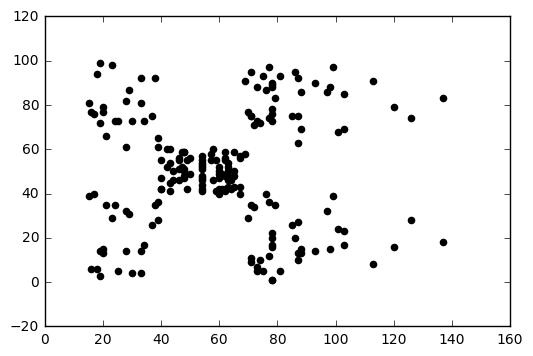

In [831]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],color='k')

In [832]:
#plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='k')

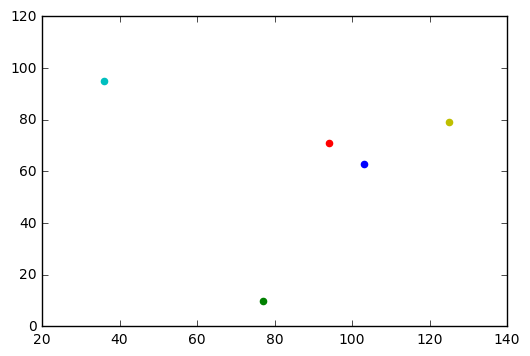

In [833]:
cmap={1:'r',2:'b',3:'g',4:'c',5:'y',6:'k'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=cmap[i])   

In [834]:
def assignment(df1,centroids):
    for i in centroids.keys():
        df1['distance_from_{}'.format(i)]=np.sqrt((centroids[i][0]-df1['Annual Income (k$)'])**2+
                                                 (centroids[i][1]-df1['Spending Score (1-100)'])**2)
        centroids_distance_col=['distance_from_{}'.format(i) for i in centroids.keys()]
        df1['closest'] = df1.loc[:,centroids_distance_col].idxmin(axis=1)
        df1['closest'] = df1['closest'].map(lambda x:int(x.lstrip('distance_from_')))
        df1['color'] = df1['closest'].map(lambda x:cmap[x])
    return df1



In [835]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df1[df1['closest']==i]['Annual Income (k$)'])
        centroids[i][1] = np.mean(df1[df1['closest']==i]['Spending Score (1-100)'])
    return k

In [836]:
centroids

{1: [94, 71], 2: [103, 63], 3: [77, 10], 4: [36, 95], 5: [125, 79]}

In [837]:
#old = df1['closest'].copy(deep=True)
df1 = assignment(df1,centroids)
centroids = update(centroids) 

In [838]:
centroids

{1: [71.91666666666667, 69.7],
 2: [113.2, 44.4],
 3: [60.08045977011494, 27.413793103448278],
 4: [34.27272727272727, 66.45454545454545],
 5: [124.0, 81.75]}

In [839]:
#df1 = assignment(df1,centroids)
df1

,Annual Income (k$),Spending Score (1-100),distance_from_1,closest,color,distance_from_2,distance_from_3,distance_from_4,distance_from_5
0,15,39,85.234969,4,c,91.214034,68.447060,59.808026,117.046999
1,15,81,79.630396,4,c,89.822046,94.260278,25.238859,110.018180
2,16,6,101.533246,3,g,104.009615,61.131007,91.219515,131.186890
3,16,77,78.230429,4,c,88.119237,90.609050,26.907248,109.018347
4,17,40,83.006024,4,c,89.022469,67.082039,58.189346,114.825955
5,17,76,77.162167,4,c,86.977008,89.196412,26.870058,108.041659
6,18,6,100.005000,3,g,102.342562,59.135438,90.801982,129.529919
7,18,94,79.404030,4,c,90.476516,102.649890,18.027756,108.046286
8,19,3,101.237345,3,g,103.227903,58.420887,93.557469,130.430058
9,19,72,75.006666,4,c,84.480767,84.899941,28.600699,106.230881


In [840]:
#plt.scatter(df1.iloc[:,0],df1.iloc[:,1],color=df1['color'])
#df1.iloc[:,3]    

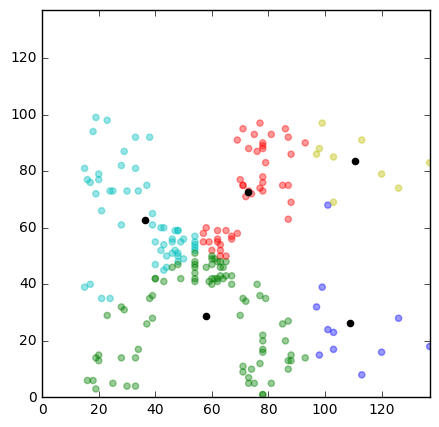

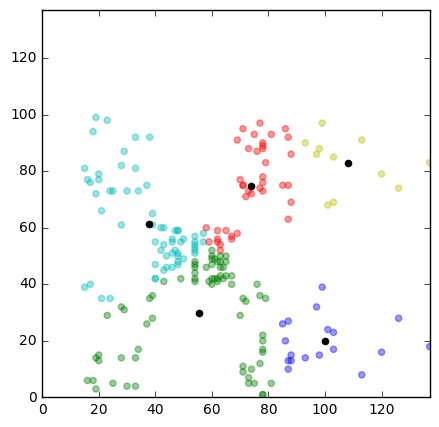

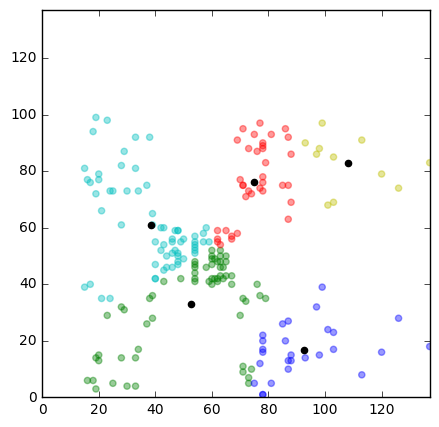

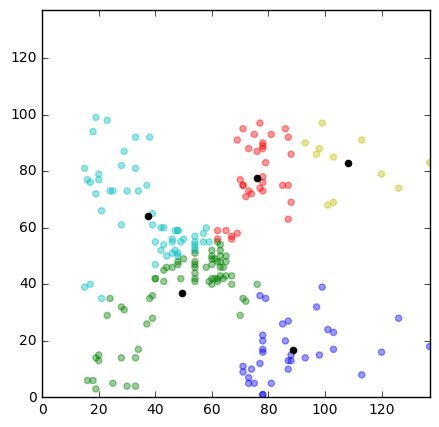

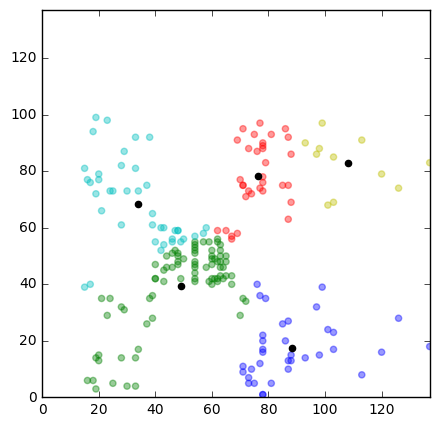

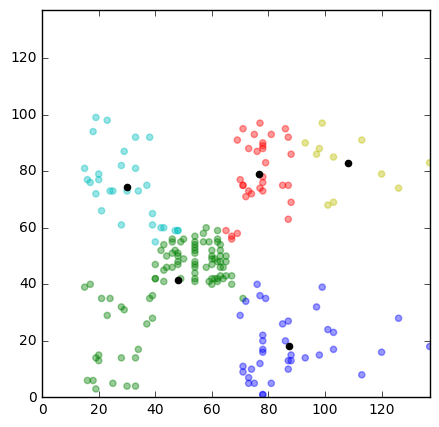

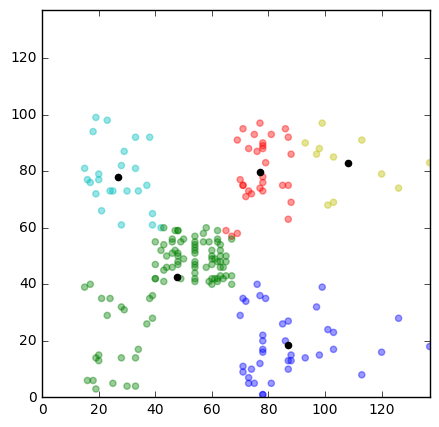

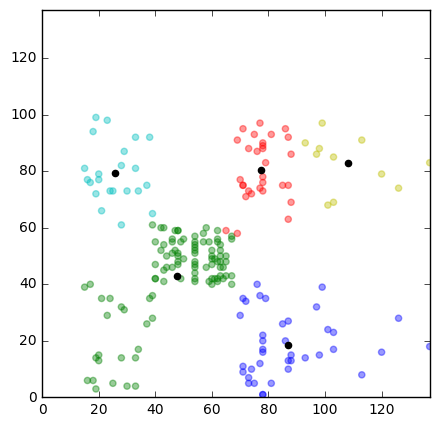

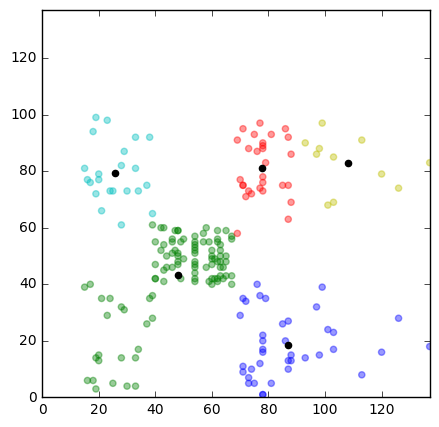

In [841]:
df1 = assignment(df1,centroids)

while True:
    old = df1['closest'].copy(deep=True)
    centroids = update(centroids)  
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes()
    plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],alpha=0.4,color=df1['color'])
    for i in centroids.keys():
        plt.scatter(*centroids[i], color='k')
    plt.xlim(0, 137)
    plt.ylim(0, 137)
    df1 = assignment(df1,centroids)   
    if old.equals(df1['closest']):
        break

In [394]:
df1 = assignment(df1,centroids)

In [395]:
df1.head()

,Annual Income (k$),Spending Score (1-100),distance_from_1,closest,color,distance_from_2,distance_from_3,distance_from_4,distance_from_5
0,15,39,58.523500,3,g,54.561891,18.601075,101.202767,109.836242
1,15,81,58.523500,3,g,54.561891,18.601075,101.202767,109.836242
2,16,6,57.245087,3,g,53.150729,18.867962,100.019998,108.452755
3,16,77,57.245087,3,g,53.150729,18.867962,100.019998,108.452755
4,17,40,55.973208,3,g,51.739733,19.235384,98.843310,107.070071
